# Exercise: Imaging and Deconvolution

Optical imaging systems like microscopes and telescopes are generally modeled as linear shift-invariant systems. In such systems, the imaging process can be represented as a convolution operation between the object $f(x, y)$ and the system's point spread function $H(x, y)$.

The convolution equation in the spatial domain is given by:

$$
g(x, y) = f(x, y) * H(x, y)
$$

The convolution theorem tells us that convolution in the spatial domain is equivalent to element-wise multiplication in the frequency domain:

$$
G(u, v) = F(u, v) \times H(u, v)
$$

where $G(u, v), F(u, v)$ and $H(u, v)$ are the Fourier Transforms of $g(x, y), f(x, y)$ and $H(x, y)$, respectively.

## Task 1: Generate an Object and Circular Aperture

You're provided with a function to generate a square object `generate_square_object` and another to create a circular aperture `generate_circular_aperture`. The circular aperture serves as the point spread function $H(x, y)$.

## Task 2: Convolve the Object with the PSF (Point Spread Function)

The function `fft_convolve_image` is designed to perform this task. It uses FFT (Fast Fourier Transform) to shift to the frequency domain, perform the convolution, and then shifts back to the spatial domain.

## Task 3: Deconvolve the Image to Recover the Original Object

When the Fourier Transform of the Point Spread Function $H(u, v)$ is positive, deconvolution in the frequency domain essentially involves dividing the Fourier Transform of the convolved or blurred image $G(u, v)$ by $H(u, v)$:

$$
F_{\text{deconv}}(u, v) = \frac{G(u, v)}{H(u, v)}
$$

After this conditional division, an inverse Fourier Transform will provide an approximation of the original object $f(x, y)$.

You'll implement this in the function `deconvolve_image`.

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def generate_square_object(N):
    """
    Generate a 2D tensor representing a square object.

    Parameters:
    - N (int): The size of the square grid.

    Returns:
    - torch.Tensor: 2D tensor with a square of value 1 in the center, and 0 elsewhere.
    """
    ### Your code here
    return f

def generate_circular_aperture(N, radius):
    """
    Generate a circular aperture (point spread function) as a 2D tensor.

    Parameters:
    - N (int): The size of the square grid.
    - radius (float): The radius of the circular aperture.

    Returns:
    - torch.Tensor: 2D tensor representing the circular aperture.
    """
    # Create meshgrid for the grid
    ### Your code here

    # Calculate the radius at each grid point
    ### Your code here

    # Generate the aperture: Set the values inside the radius to 1.0 and outside to 0.0
    ### Your code here

    return H

def fft_convolve_image(f, H):
    """
    Perform convolution of an image and a PSF using FFT.

    Parameters:
    - f (torch.Tensor): 2D tensor representing the object.
    - H (torch.Tensor): 2D tensor representing the PSF.

    Returns:
    - torch.Tensor: 2D tensor representing the convolved image.
    """
    # Perform FFT of the object
    ### Your code here

    # Shift zero frequency to center
    ### Your code here

    # Perform FFT of the PSF (pupil function)
    ### Your code here

    # Shift zero frequency to center
    ### Your code here

    # Convolve in frequency domain
    ### Your code here

    # Perform inverse FFT
    ### Your code here

    return torch.abs(G)

def deconvolve_image(G, H_F):
    """
    Perform deconvolution using FFT.

    Parameters:
    - G (torch.Tensor): Fourier transform of the convolved image.
    - H_F (torch.Tensor): Fourier transform of the PSF.

    Returns:
    - torch.Tensor: 2D tensor representing the deconvolved object.
    """
    # Shift zero frequency to center for FFT of convolved image and PSF
    ### Your code here

    # Perform deconvolution
    ### Your code here

    # Perform inverse FFT
    ### Your code here

    # Perform inverse FFT shift
    ### Your code here

    return torch.abs(f_deconv)

## Next: Run the block below to show the circular aperture

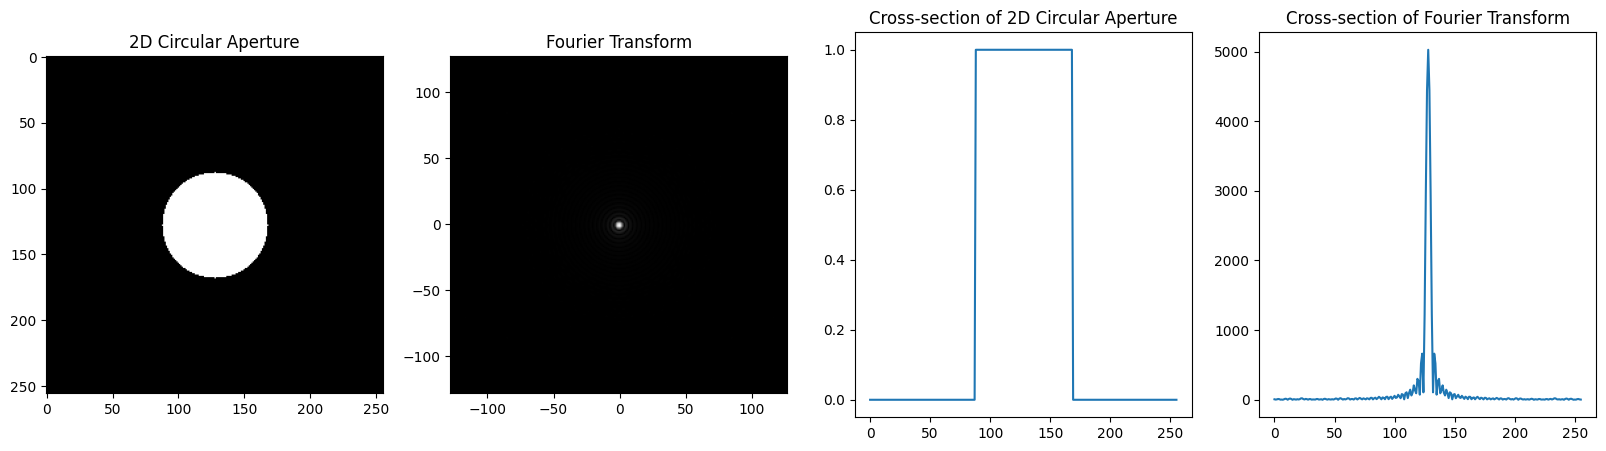

In [ ]:
# Generate and plot circular aperture
aperture = generate_circular_aperture(256, 40)

# Compute Fourier Transform and shift it to center the zero-frequency component
fourier_aperture = torch.fft.fftshift(torch.fft.fft2(aperture))

# Compute the magnitude of the Fourier Transform
magnitude = torch.abs(fourier_aperture)

# Take cross-sections at the center
size = aperture.shape[0]
center = size // 2
cross_section_x = aperture[center, :]
cross_section_fourier_x = magnitude[center, :]

# Plotting the results
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot original 2D circular aperture
axs[0].imshow(aperture.numpy(), cmap='gray')
axs[0].set_title('2D Circular Aperture')

# Plot Fourier Transform of 2D circular aperture
axs[1].imshow(magnitude.numpy(), cmap='gray', extent=[-center, center - 1, -center, center - 1])
axs[1].set_title('Fourier Transform')

# Plot Cross-section of 2D circular aperture
axs[2].plot(cross_section_x.numpy())
axs[2].set_title('Cross-section of 2D Circular Aperture')

# Plot Cross-section of Fourier Transform
axs[3].plot(cross_section_fourier_x.numpy())
axs[3].set_title('Cross-section of Fourier Transform')

plt.show()

## Run the block below to plot your results. You will see the effect of the size of the aperture.

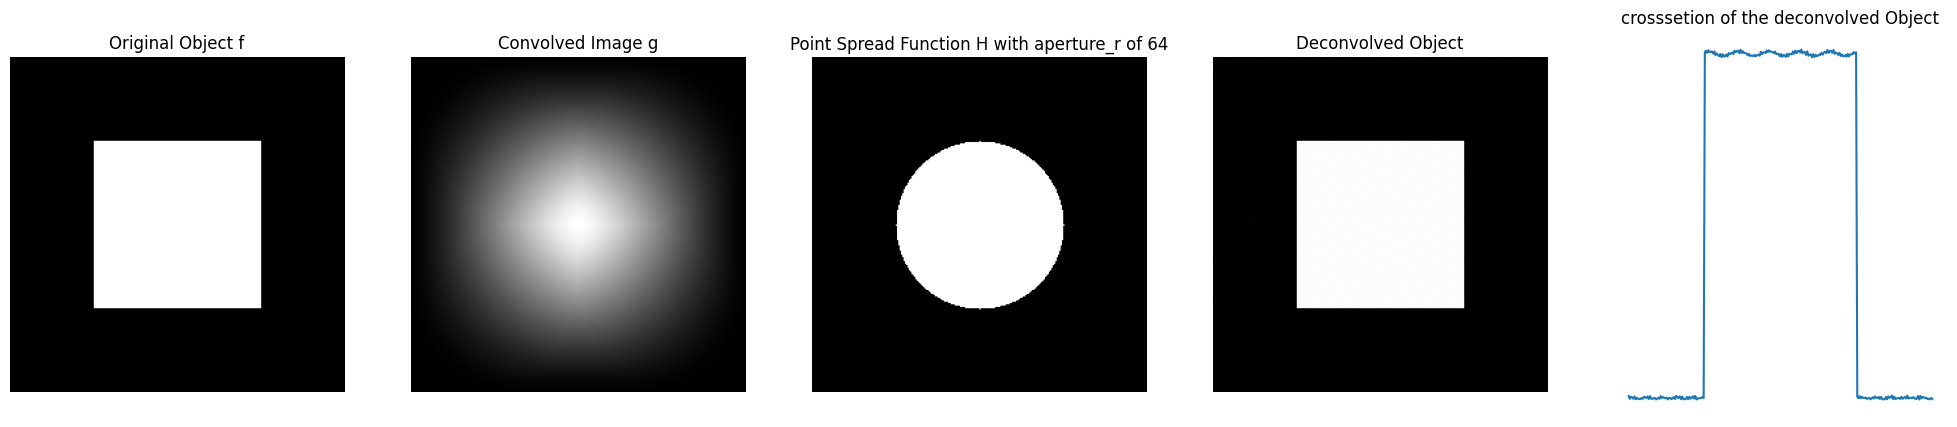

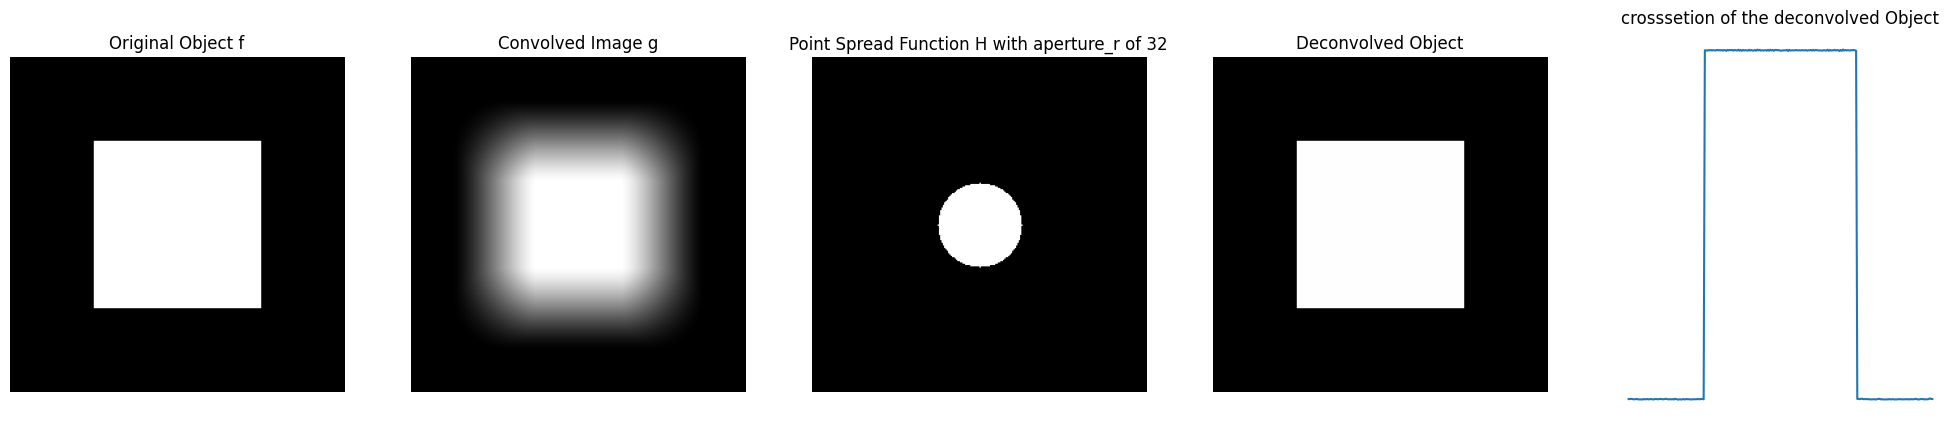

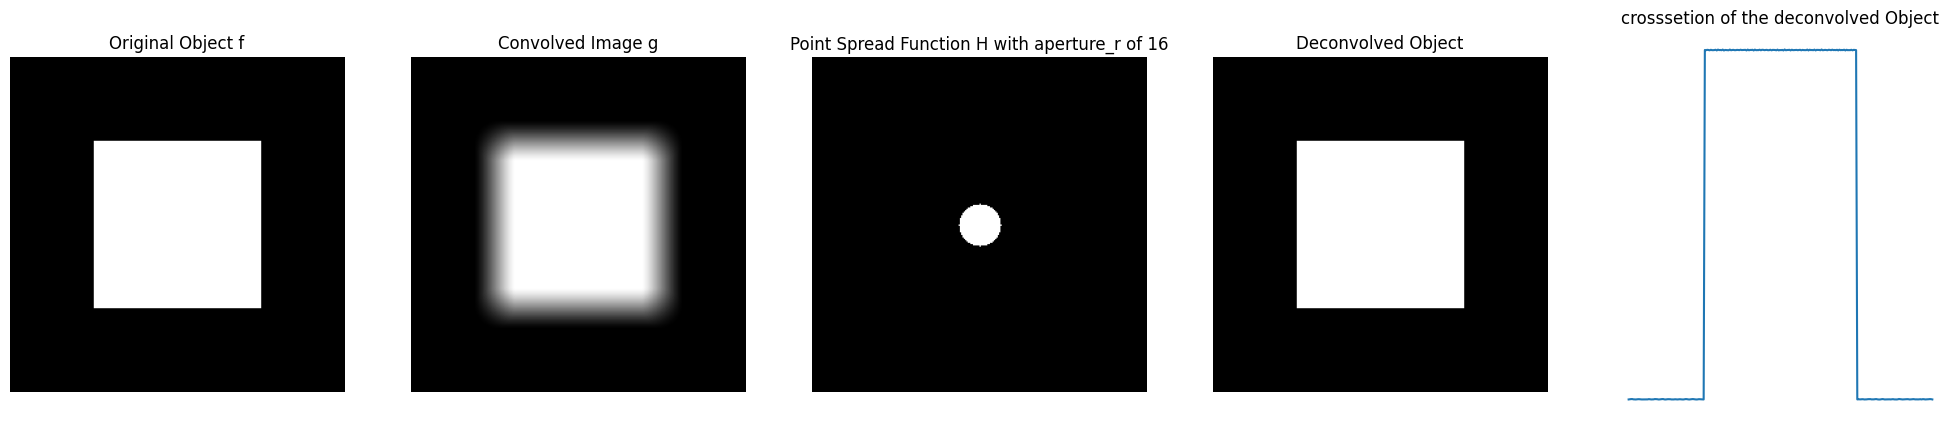

In [ ]:
# Generate the object and PSF
N = 256
for aperture_r in [N//4, N//8, N//16]:
    # Generate a square object for the example
    f = generate_square_object(N)
    # Generate a circular aperture for the example
    H = generate_circular_aperture(N, aperture_r)

    # Convolve the object with the PSF using FFT
    g = fft_convolve_image(f, H)

    # Take the FFTs for use in deconvolution
    G = torch.fft.fft2(g)
    H_F = torch.fft.fft2(H, s=g.shape)

    # Deconvolve to estimate the original object
    f_deconv = deconvolve_image(G, H_F)

    # Plotting the results
    fig, axs = plt.subplots(1, 5, figsize=(25, 5))
    axs[0].imshow(f, cmap='gray')
    axs[0].set_title('Original Object f')
    axs[1].imshow(g, cmap='gray')
    axs[1].set_title('Convolved Image g')
    axs[2].imshow(H, cmap='gray')
    axs[2].set_title(f'Point Spread Function H with aperture_r of {aperture_r}')
    axs[3].imshow(f_deconv, cmap='gray')
    axs[3].set_title(f'Deconvolved Object')
    axs[4].plot(np.arange(0, 256), f_deconv[128, :])
    axs[4].set_title(f'crosssetion of the deconvolved Object')

    for ax in axs:
        ax.axis('off')

    plt.show()

# Next: Generate a 2D Sinc² PSF

Generate a 2D sinc² function to use as a Point Spread Function (PSF). The mathematical formula for a 2D sinc² function is:

$$
\text{sinc2D}^2(x, y) = \left( \frac{\sin(x)}{x} \right)^2 \times \left( \frac{\sin(y)}{y} \right)^2
$$

## Task

**Generate 2D Sinc² PSF**: Utilize the `generate_sinc2D_squared` function to produce the PSF. Experiment with different parameters.

In [ ]:
def generate_sinc2D_squared(size, grid_range, normalize=True):
    """
    Generate a 2D sinc^2 function as the point spread function (PSF).

    Parameters:
    - size (int): The size of the PSF. Assumes a square PSF.
    - grid_range (float): The range for x and y values, from -grid_range to grid_range.
    - normalize (bool): Whether to normalize the PSF so it sums to 1.

    Returns:
    - torch.Tensor: The 2D sinc^2 function (PSF).
    """

    ### Your code here
    return None

## Next: Run the block below to show the 2D Sinc^2 Function

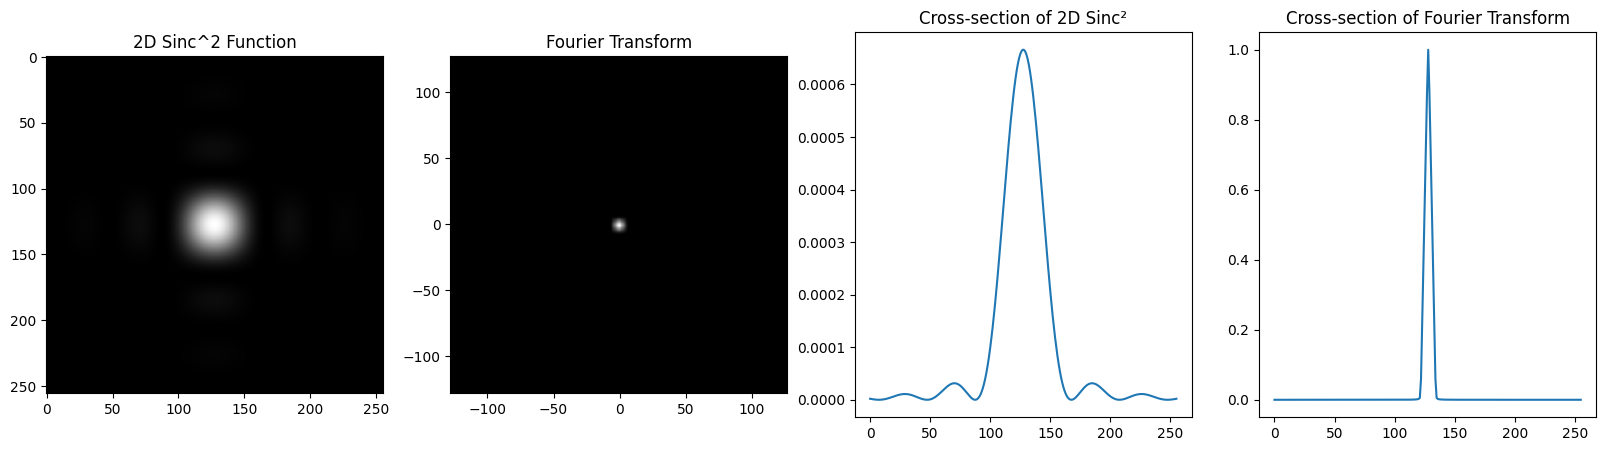

In [ ]:
# Generate and plot 2D sinc^2 function
sinc2D_squared = generate_sinc2D_squared(256, 10)

# Compute Fourier Transform and shift it to center the zero-frequency component
fourier_sinc2D_squared = torch.fft.fftshift(torch.fft.fft2(sinc2D_squared))

# Compute the magnitude of the Fourier Transform
magnitude = torch.abs(fourier_sinc2D_squared)

# Take cross-sections at the center
size = sinc2D_squared.shape[0]
center = size // 2
cross_section_x = sinc2D_squared[center, :]
cross_section_fourier_x = magnitude[center, :]

# Plotting the results
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot original 2D sinc^2 function
axs[0].imshow(sinc2D_squared.numpy(), cmap='gray')
axs[0].set_title('2D Sinc^2 Function')

# Plot Fourier Transform of 2D sinc^2 function
axs[1].imshow(magnitude.numpy(), cmap='gray', extent=[-center, center - 1, -center, center - 1])
axs[1].set_title('Fourier Transform')

# Plot Cross-section of 2D sinc^2 function
axs[2].plot(cross_section_x.numpy())
axs[2].set_title('Cross-section of 2D Sinc²')

# Plot Cross-section of Fourier Transform
axs[3].plot(cross_section_fourier_x.numpy())
axs[3].set_title('Cross-section of Fourier Transform')

plt.show()

## Now: Run the block below to show for 2D Sinc^2 PSF, you will see a problem with the previous inverse, what it is?

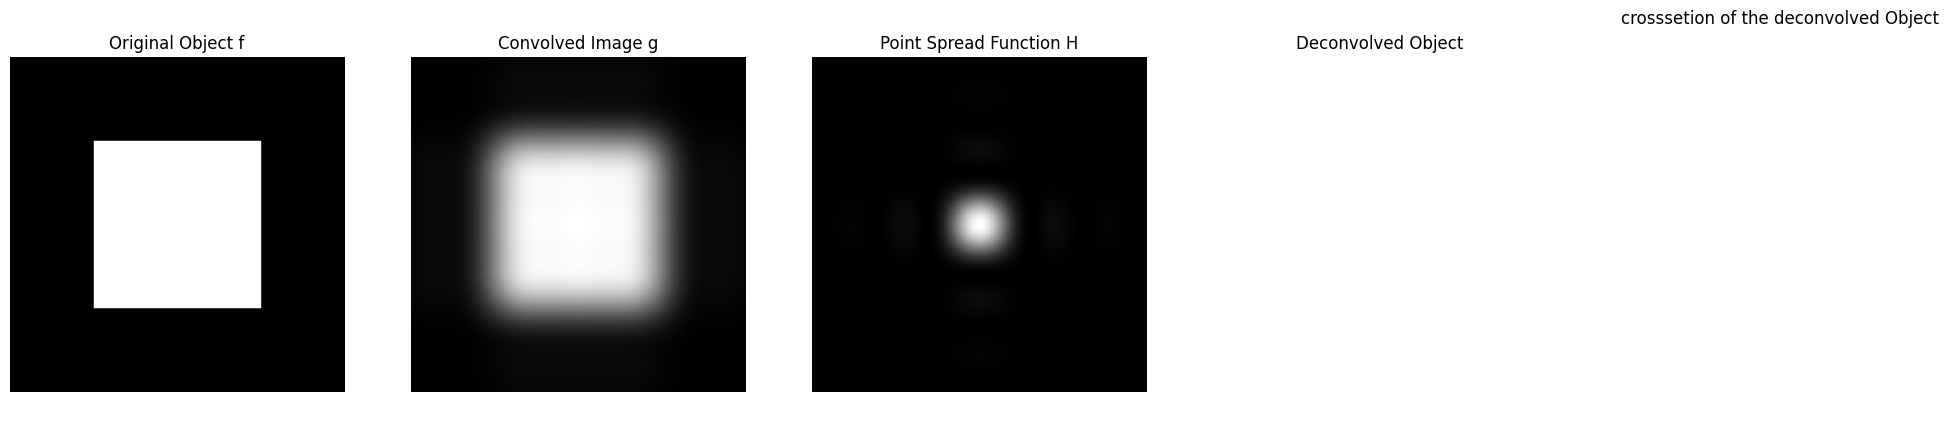

In [ ]:
# Generate the object and PSF
N = 256
# Generate a square object for the example
f = generate_square_object(N)
# Generate a circular aperture for the example
H = generate_sinc2D_squared(N, 10)

# Convolve the object with the PSF using FFT
g = fft_convolve_image(f, H)

# Take the FFTs for use in deconvolution
G = torch.fft.fft2(g)
H_F = torch.fft.fft2(H, s=g.shape)

# Deconvolve to estimate the original object
f_deconv = deconvolve_image(G, H_F)

# Plotting the results
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
axs[0].imshow(f, cmap='gray')
axs[0].set_title('Original Object f')
axs[1].imshow(g, cmap='gray')
axs[1].set_title('Convolved Image g')
axs[2].imshow(H, cmap='gray')
axs[2].set_title('Point Spread Function H')
axs[3].imshow(f_deconv, cmap='gray')
axs[3].set_title(f'Deconvolved Object')
axs[4].plot(np.arange(0, 256), f_deconv[128, :])
axs[4].set_title(f'crosssetion of the deconvolved Object')

for ax in axs:
    ax.axis('off')

plt.show()

# Now, given the cross-section of the fourier transform of the 2D Sinc^2 Function, what you should do, instead of division, is a conditional division:

$$
F_{\text{deconv}}(u, v) =
\begin{cases}
\frac{G(u, v)}{H(u, v)} & \text{if } |H(u, v)| > \text{tolerance} \\
0 & \text{otherwise}
\end{cases}
$$

In [ ]:
def deconvolve_image_better(G, H_F, tolerance=1e-5):
    """
    Perform deconvolution using FFT.

    Parameters:
    - G (torch.Tensor): Fourier transform of the convolved image.
    - H_F (torch.Tensor): Fourier transform of the PSF.
    - tolerance (float).

    Returns:
    - torch.Tensor: 2D tensor representing the deconvolved object.
    """
    # Shift zero frequency to center for FFT of convolved image and PSF
    ### Your code here

    # Perform deconvolution
    ### Your code here

    # Perform inverse FFT
    ### Your code here

    # Perform inverse FFT shift
    ### Your code here

    return torch.abs(f_deconv)

## Plot using the block below

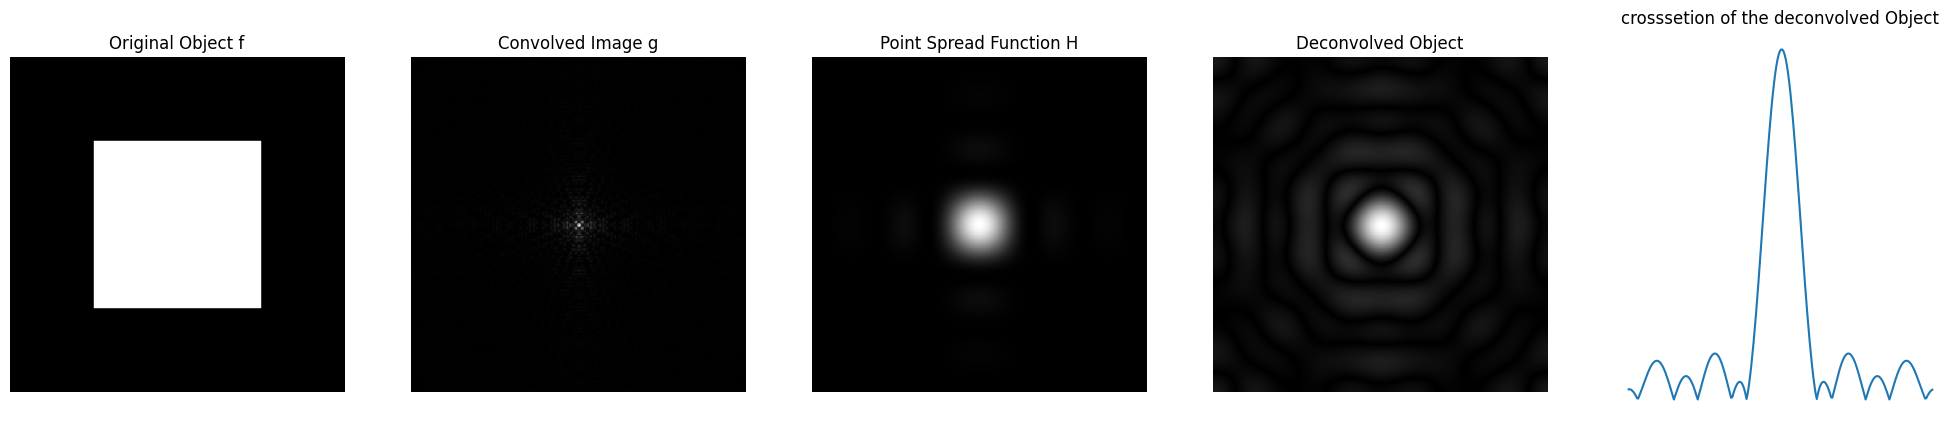

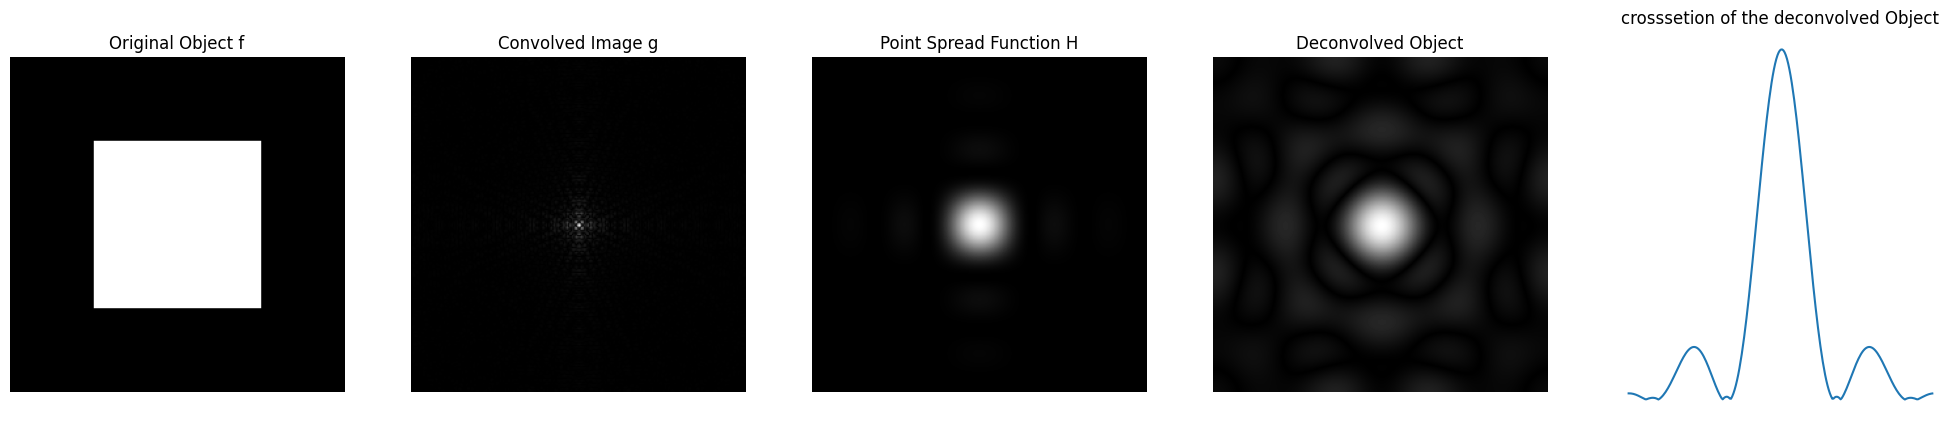

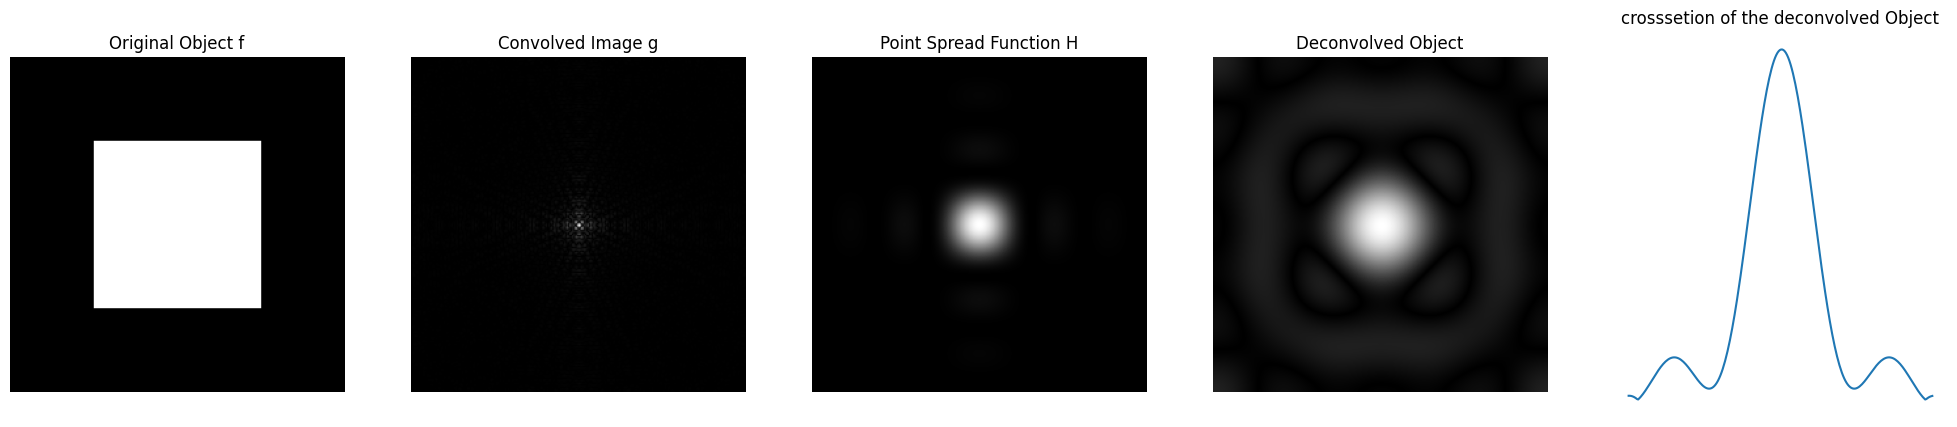

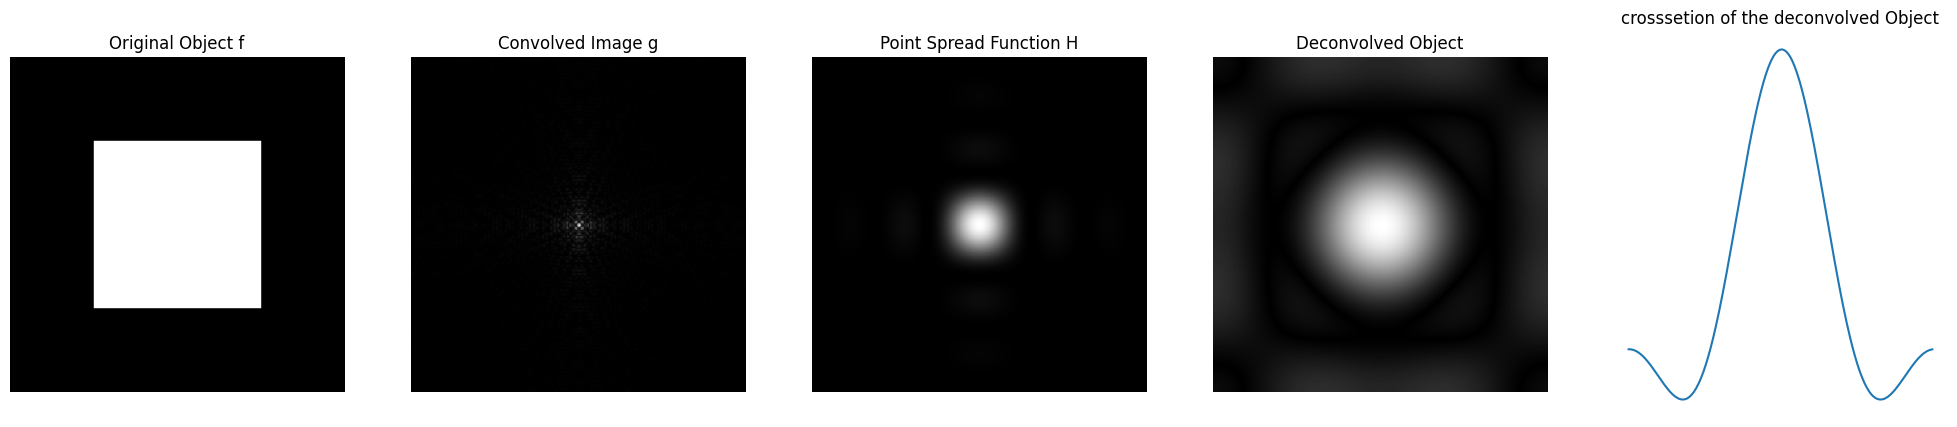

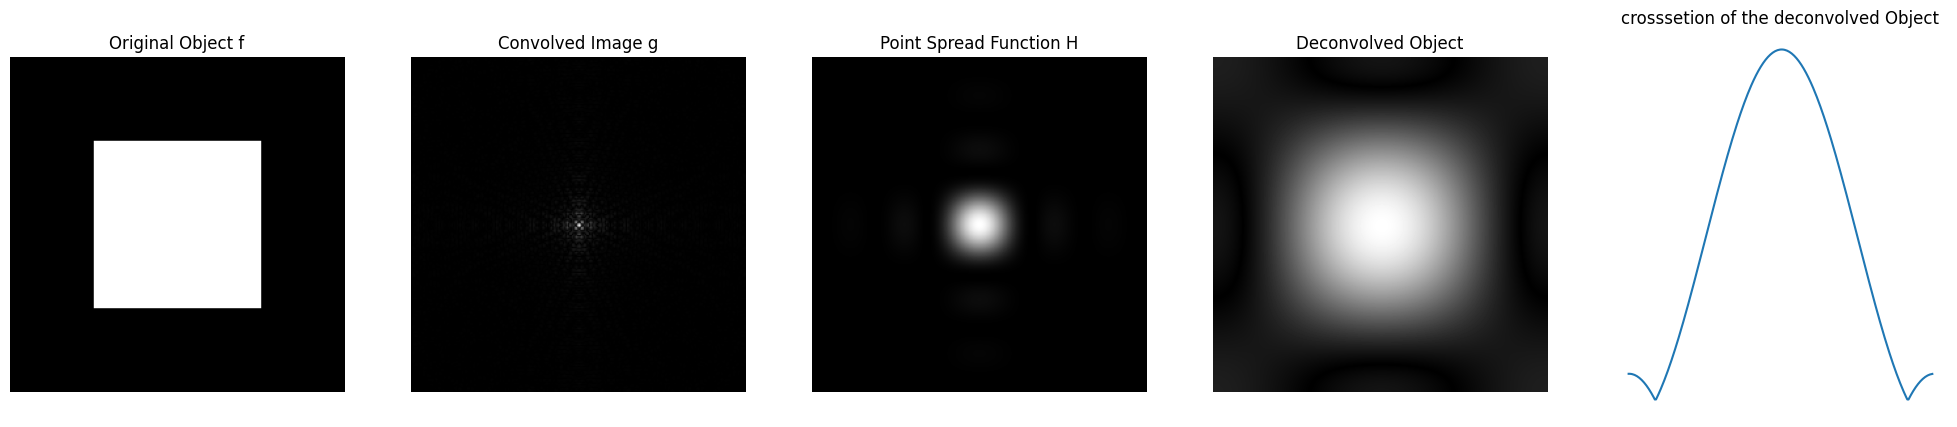

In [ ]:
for tolerance in [0.15 * i for i in range(1, 6)]:
    # Generate the object and PSF
    N = 256
    # Generate a square object for the example
    f = generate_square_object(N)
    # Generate a circular aperture for the example
    H = generate_sinc2D_squared(N, 10)

    # Convolve the object with the PSF using FFT
    g = deconvolve_image_better(f, H)

    # Take the FFTs for use in deconvolution
    G = torch.fft.fft2(g)
    H_F = torch.fft.fft2(H, s=g.shape)

    # Deconvolve to estimate the original object
    f_deconv = deconvolve_image_better(G, H_F, tolerance=tolerance)

    # Plotting the results
    fig, axs = plt.subplots(1, 5, figsize=(25, 5))
    axs[0].imshow(f, cmap='gray')
    axs[0].set_title('Original Object f')
    axs[1].imshow(g, cmap='gray')
    axs[1].set_title('Convolved Image g')
    axs[2].imshow(H, cmap='gray')
    axs[2].set_title('Point Spread Function H')
    axs[3].imshow(f_deconv, cmap='gray')
    axs[3].set_title(f'Deconvolved Object')
    axs[4].plot(np.arange(0, 256), f_deconv[128, :])
    axs[4].set_title(f'crosssetion of the deconvolved Object')

    for ax in axs:
        ax.axis('off')

    plt.show()

## Next:

Your task is to implement the `add_gaussian_noise` and `add_poisson_noise` functions.

1. **Gaussian Noise**: Use the PyTorch function `torch.normal(mean=0.0, std=std, size=image.shape)` to generate Gaussian noise and add it to the image.
2. **Poisson Noise**: The noisy image $g_{\text{poisson}}(x, y)$ is generated as a Poisson-distributed random variable around each original pixel value. Use the PyTorch function `torch.poisson(image * scale) / scale` to generate a new image with Poisson-distributed pixel values centered around the original pixel values.

Ensure the resulting noisy image values are clipped or normalized to lie within a reasonable range (e.g., [0, 2]).

In [ ]:
def add_gaussian_noise(image, mean=0.0, std=0.1):
    """
    Add Gaussian noise to the image.

    Parameters:
    - image (torch.Tensor): The original image tensor.
    - mean (float): The mean of the Gaussian distribution.
    - std (float): The standard deviation of the Gaussian distribution.

    Returns:
    - torch.Tensor: The noisy image.
    """
    # Generate Gaussian noise with the same shape as the image
    ### Your code here

    # Add the Gaussian noise to the original image
    ### Your code here

    # Clip the values to be in [0, 1] (Assuming the original image is normalized)
    ### Your code here

    return noisy_image

def add_poisson_noise(image, scale=1.0):
    """
    Add Poisson noise to the image.

    Parameters:
    - image (torch.Tensor): The original image tensor.
    - scale (float): The scaling factor for the Poisson noise.

    Returns:
    - torch.Tensor: The noisy image.
    """
    # Generate a new image where pixel values are Poisson-distributed around the original values
    ### Your code here

    # Clip the values to be in [0, 1] (Assuming the original image is normalized)
    ### Your code here

    return noisy_image

# Final Task: Deconvolution with Noisy Measurements

## Objective:
Simulate real-world scenarios by including noise to measurements and observe its impact on deconvolution.

## Steps:

1. **Add Noise**: Use `add_gaussian_noise` and `add_poisson_noise` to add noise to your measurement $g$. Try at least three different noise levels for each type.

2. **Deconvolve**: Apply your deconvolution function on these noisy images.

3. **Analyze**: Note how noise gets amplified in the deconvolved images, especially at higher noise levels.

### Discussion Points:

- How does noise level affect deconvolution quality?
- Does the deconvolution process amplify noise? If so, how noticeably?

Complete these tasks to understand the real-world challenges of deconvolution.

<span style="color:red; font-size:48px; font-weight:bold"># In the near future, we will teach betters ways to do inversion. Stay tuned</span>